## PRIYANSU PANDA

### IMPORTING REQUIRED LIBRARIES

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING THE DATA

In [49]:
data = pd.read_csv("Housing.csv")

In [50]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [51]:
print(data.shape)

(5000, 7)


#### THERE ARE 5000 ROWS AND 7 COLUMNS.

#### AS ADDRESS COLUMN DOES NOT GIVE ANY ADDITION TO PRICE WE WILL DROP IT FROM OUR DATA.

In [71]:
data = data.drop(["Address"],axis=1)

### CHECKING FOR NULL VALUES & OUTLIERS

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [102]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### CORRELATION

<AxesSubplot:>

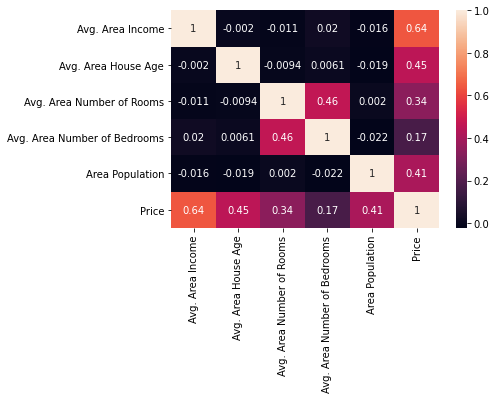

In [77]:
corr = data.corr()
sns.heatmap(corr,annot=True)

#### THERE IS HIGHEST CORRELATION BETWEEN PRICE AND AVG AREA INCOME.
#### AS WE ARE CREATING A SIMPLE LINEAR REGRESSION WE ARE GONNA CHHOSE AVG AREA INCOME AS OUR FEATURE.

### SELECTING FEATURE & TARGET VALUE

In [87]:
x = data.iloc[:,0:1]
print(x.shape)

(5000, 1)


In [88]:
y = data.iloc[:,5]
print(y.shape)

(5000,)


### SPLITTING THE DATA INTO TRAINING & TESTING SET

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=1)

### CREATING REGRESSION MODEL

In [90]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [91]:
model.fit(x_train,y_train)

LinearRegression()

### PREDICTION

In [92]:
y_pred = model.predict(x_test)

In [98]:
pd.DataFrame({"Actual Value" : y_test, "Predicted Value": y_pred })

,Actual Value,Predicted Value
2764,1.413580e+06,1.367229e+06
4767,1.618721e+06,1.391747e+06
3814,8.413925e+05,1.213014e+06
3499,8.814439e+05,1.198635e+06
2735,1.174748e+06,1.162303e+06
...,...,...
448,1.309986e+06,1.186592e+06
921,1.059871e+06,1.221077e+06
4087,1.644923e+06,1.904134e+06
1242,1.106337e+06,1.112348e+06


### GRAPHICAL REPRESENTATION

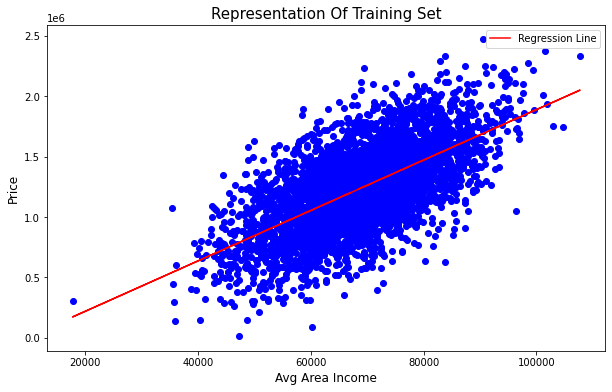

In [129]:
plt.figure(figsize=(10,6))
plt.title("Representation Of Training Set",size=15)
plt.plot(x_train,model.predict(x_train),color="red",label="Regression Line")
plt.scatter(x_train,y_train,color="blue")
plt.xlabel("Avg Area Income",size=12)
plt.ylabel("Price",size=12)
plt.legend()
plt.show()

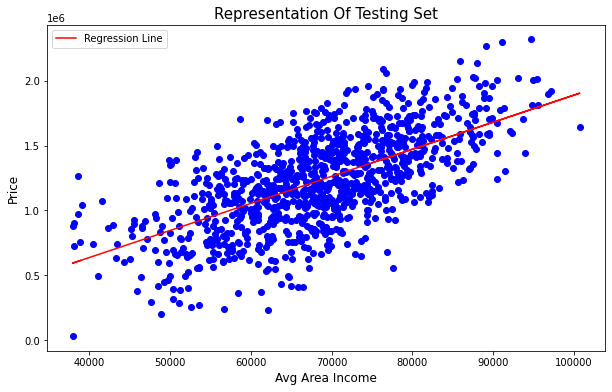

In [132]:
plt.figure(figsize=(10,6))
plt.title("Representation Of Testing Set",size=15)
plt.plot(x_test,y_pred,color="red",label="Regression Line")
plt.scatter(x_test,y_test,color="blue")
plt.xlabel("Avg Area Income",size=12)
plt.ylabel("Price",size=12)
plt.legend()
plt.show()

### EVALUATION OF MODEL

In [133]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))

Mean Squared Error :  75591722048.53416
Root Mean Squared Error :  274939.487976053
Mean Absolute Error :  221155.12544750964


In [134]:
print("Accuracy : ",model.score(x_test,y_test))

Accuracy :  0.4378692217221959


#### THE ACCURACY OF OUR MODEL IS NEARLY 43% i.e NOT VERY GOOD.
#### THAT MEANS SIMPLE LINEAR REGRESSION IS NOT GOOD FOR GIVEN DATASET AS THERE ARE MORE FEATURE CONTRIBUTING TO THE PRICE OF A HOUSE.